In [1]:
import wget
import sys
import math
import numpy as np
import pandas as pd
from math import log10
import matplotlib.pyplot as plt

expected = [log10(1+1/d) for d in range(1,10)]

print (expected)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829992, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


In [2]:
# programming by SO copypasting https://stackoverflow.com/questions/58125279/python-wget-module-doesnt-show-progress-bar
def bar_progress(current, total, width=80):
  progress_message = "Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total)
  # Don't use print() as it will print in new line every time.
  sys.stdout.write("\r" + progress_message)
  sys.stdout.flush()

# load data
file = wget.download('https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv', bar = bar_progress)
data = pd.read_csv(file, delimiter=',')

Downloading: 100% [764765615 / 764765615] bytes

In [3]:
confirmados = data[data['clasificacion_resumen'] == 'Confirmado']
fallecidos = data[data['fallecido'] == 'SI']

print("Total cases", len(confirmados.index))
print("Deaths", len(fallecidos.index))

provincias = list(set(confirmados['residencia_provincia_nombre'].tolist()))
provincias = sorted(provincias)
print(provincias)

# Process province counts the number of cases reported each day, 
# calculates and returns the frequency of the first digit in that province
def process_province(dataset, province):
    dataset = dataset[dataset['residencia_provincia_nombre'] == province]
    total_cases = len(dataset.index)
    d = dataset.groupby(by='fecha_diagnostico')
    print(province, ":", total_cases)
    group_size = len(d)
    
    actual = [0, 0, 0, 0, 0, 0, 0, 0, 0] # 0 - 8 index 1 to 9. 
    
    for i in d.size():
        idx = int(str(i)[:1])
        actual[idx - 1] = actual[idx - 1] + 1

    actual = list(map(lambda i : i / float(group_size), actual))
    return actual

def process_gba_zona(dataset, zona):
    dataset = dataset[dataset['residencia_departamento_nombre'] == zona]
    total_cases = len(dataset.index)
    d = dataset.groupby(by='fecha_diagnostico')
    print(zona, ":", total_cases)
    group_size = len(d)
    
    actual = [0, 0, 0, 0, 0, 0, 0, 0, 0] # 0 - 8 index 1 to 9. 
    
    for i in d.size():
        idx = int(str(i)[:1])
        actual[idx - 1] = actual[idx - 1] + 1

    actual = list(map(lambda i : i / float(group_size), actual))
    return actual, (total_cases < 1000)

def show_benford_data(dist, province_name):
    ticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))
    ax.bar(np.arange(9), dist)
    ax.plot(expected, 'r')
    ax.set_xlabel('First digit \n(' + province_name + ')')
    ax.set_ylabel('Frequency %')
    
    colors = {'Expected':'red', 'Actual':'blue'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax.legend(handles, labels)
    ax.set_xticks(np.arange(9))
    ax.set_xticklabels(ticks)
    
    fig.tight_layout()
    fig.savefig("benfords (" + province_name + ").png")

Total cases 1339333
Deaths 44067
['Buenos Aires', 'CABA', 'Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'SIN ESPECIFICAR', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán']


Buenos Aires : 595525
CABA : 153877
Catamarca : 1603
Chaco : 16956
Chubut : 20112
Corrientes : 4248
Córdoba : 105837
Entre Ríos : 20924
Formosa : 168
Jujuy : 18235
La Pampa : 4909
La Rioja : 8290
Mendoza : 54236
Misiones : 407
Neuquén : 28654
Río Negro : 29234
SIN ESPECIFICAR : 2749
Salta : 20432
San Juan : 4860
San Luis : 12054
Santa Cruz : 13303


<ipython-input-3-cad90d14e767>:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))


Santa Fe : 132586
Santiago del Estero : 13651
Tierra del Fuego : 14664
Tucumán : 61819
Buenos Aires : 23840
CABA : 6660
Catamarca : 9
Chaco : 753
Chubut : 329
Corrientes : 89
Córdoba : 2005
Entre Ríos : 642
Formosa : 3
Jujuy : 879
La Pampa : 94
La Rioja : 332
Mendoza : 1467
Misiones : 105
Neuquén : 621
Río Negro : 824
SIN ESPECIFICAR : 35
Salta : 1112
San Juan : 134
San Luis : 196
Santa Cruz : 243
Santa Fe : 2191
Santiago del Estero : 187
Tierra del Fuego : 236
Tucumán : 1081


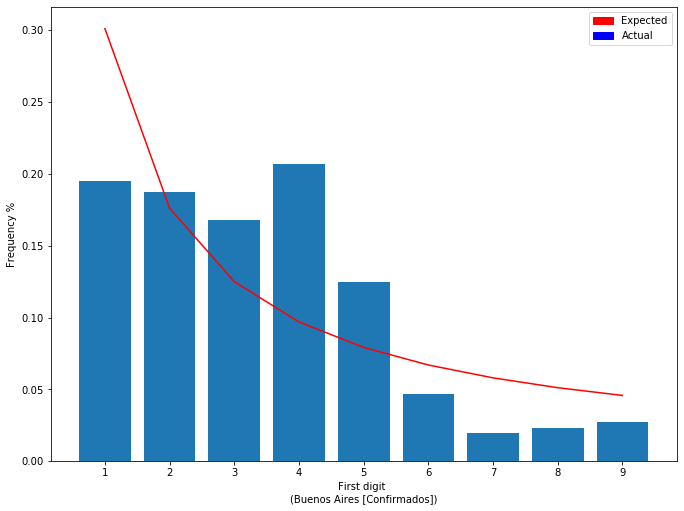

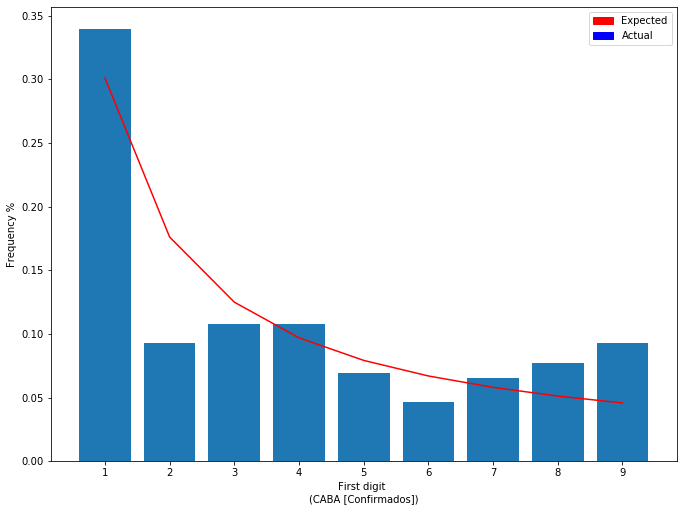

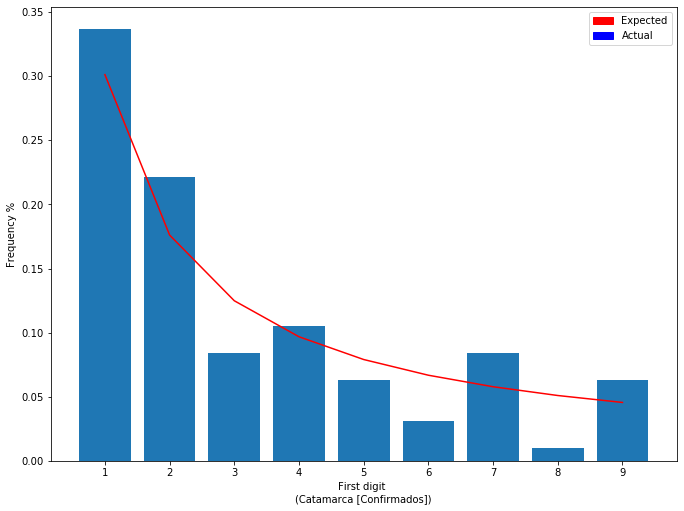

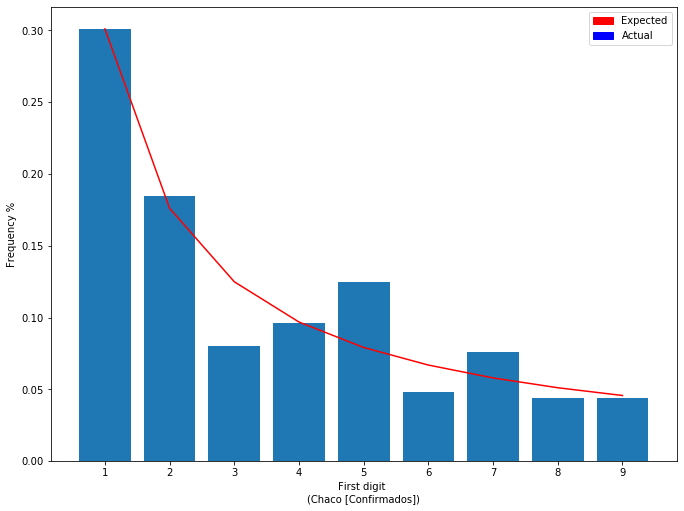

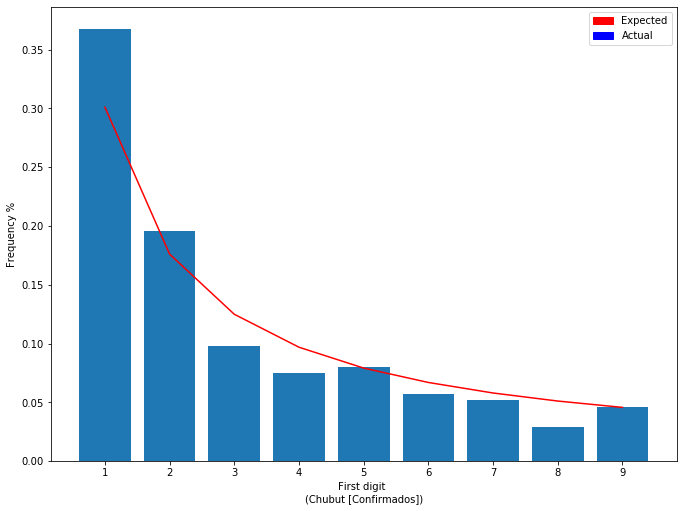

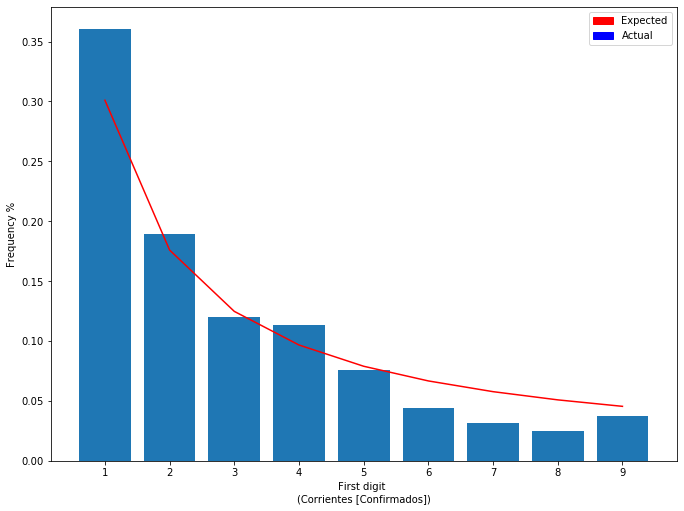

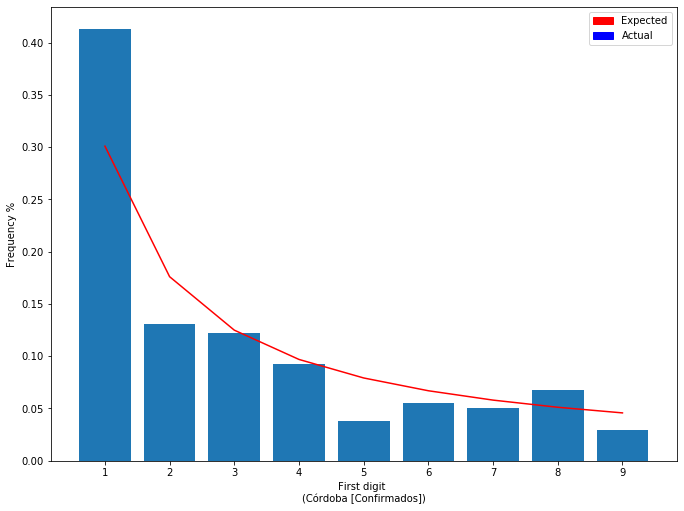

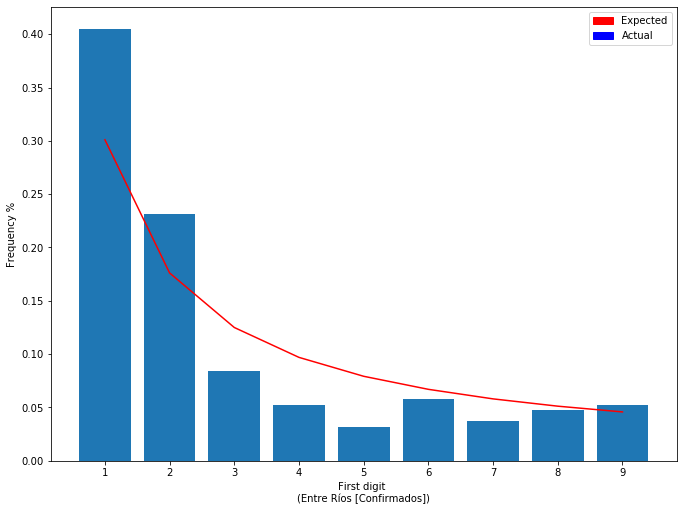

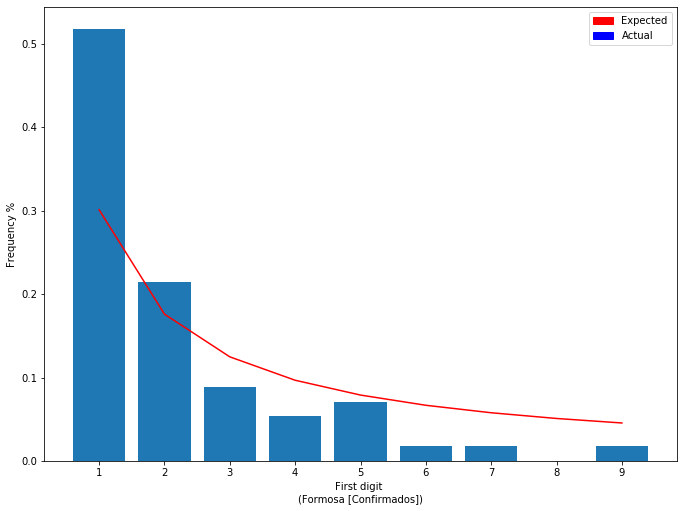

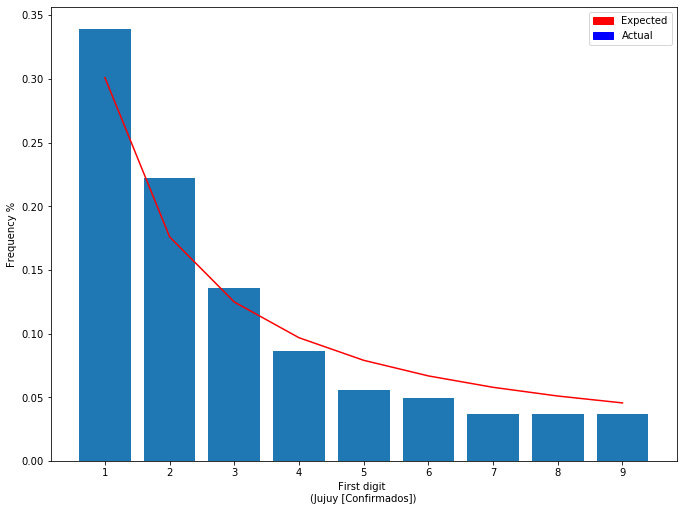

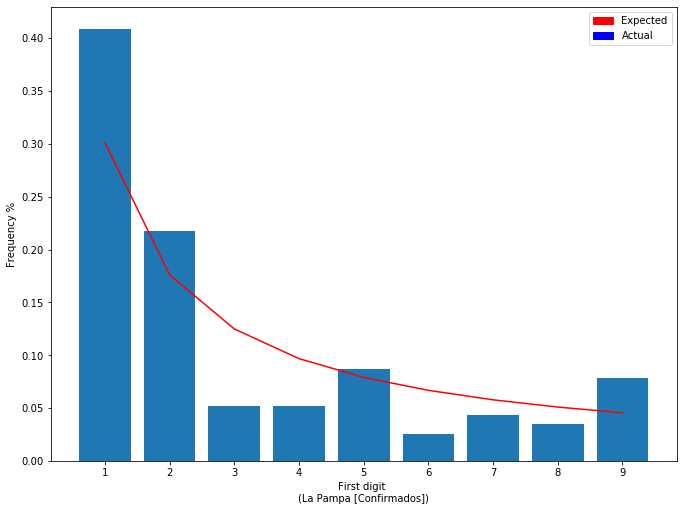

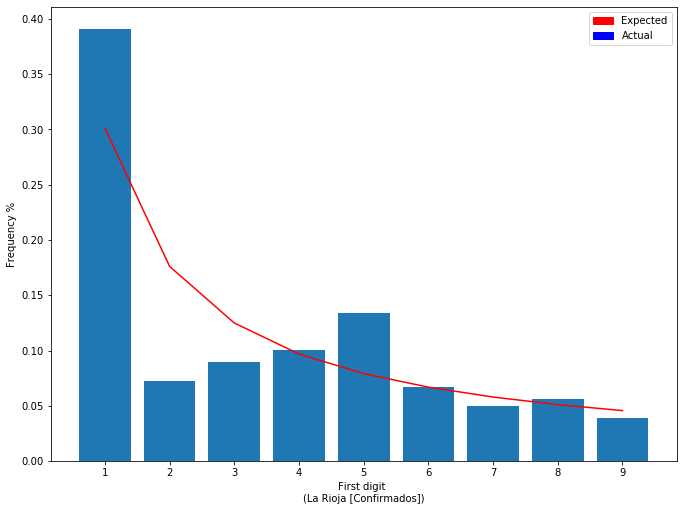

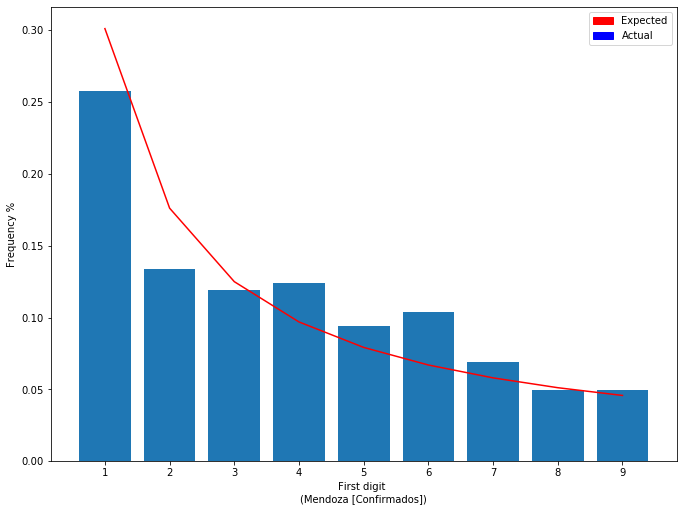

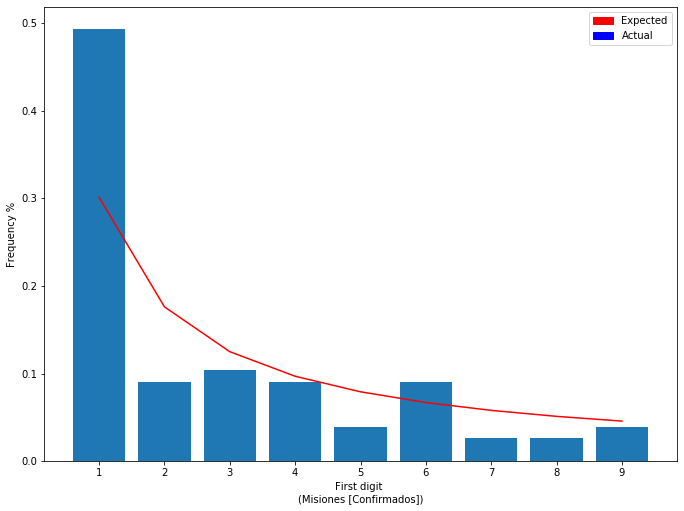

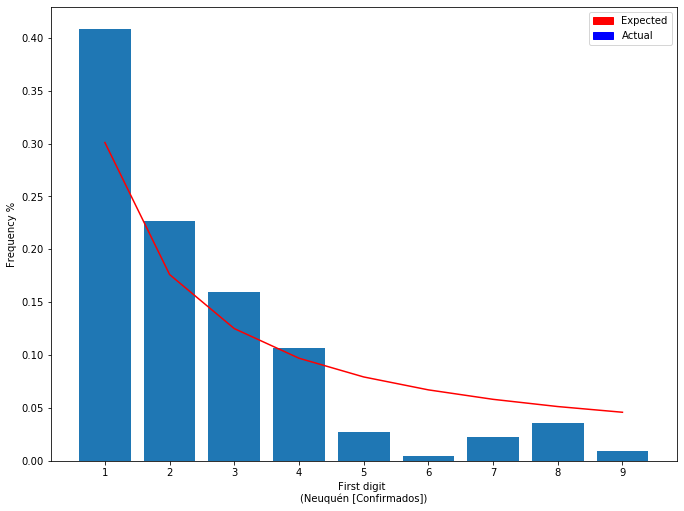

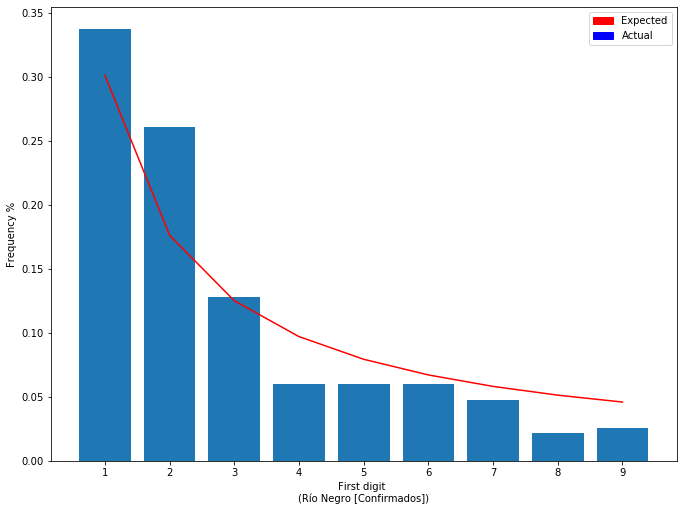

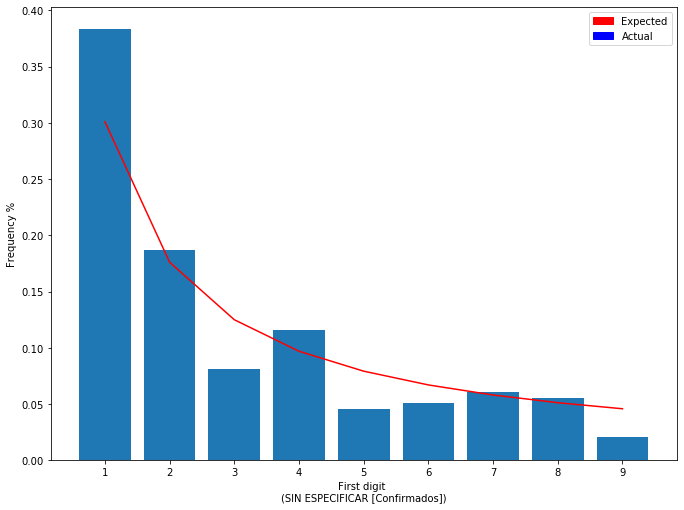

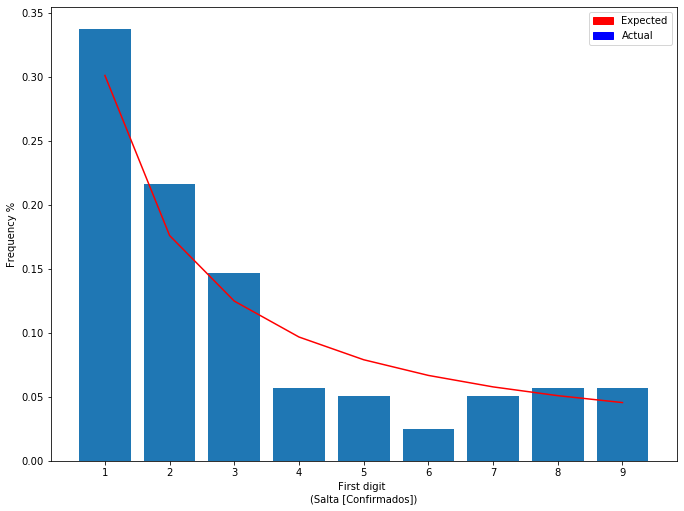

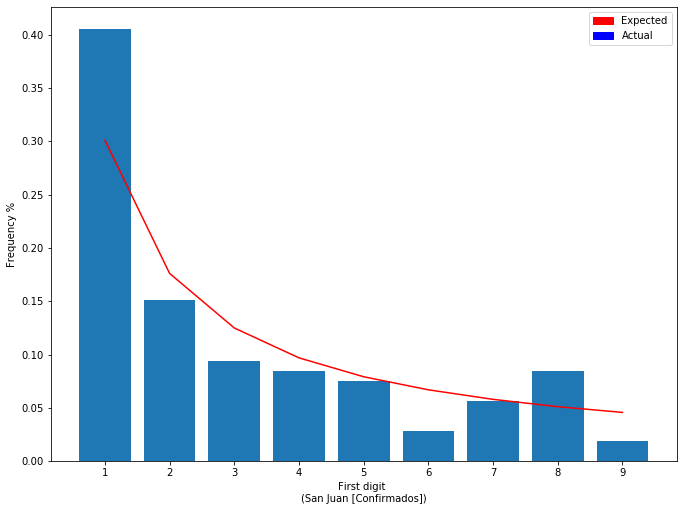

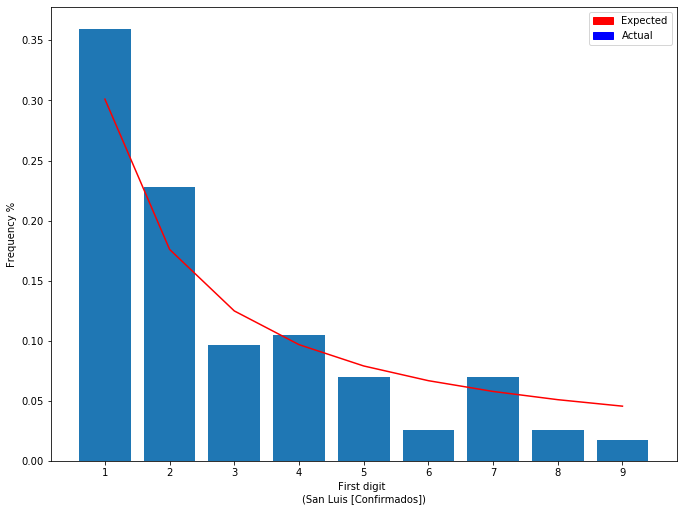

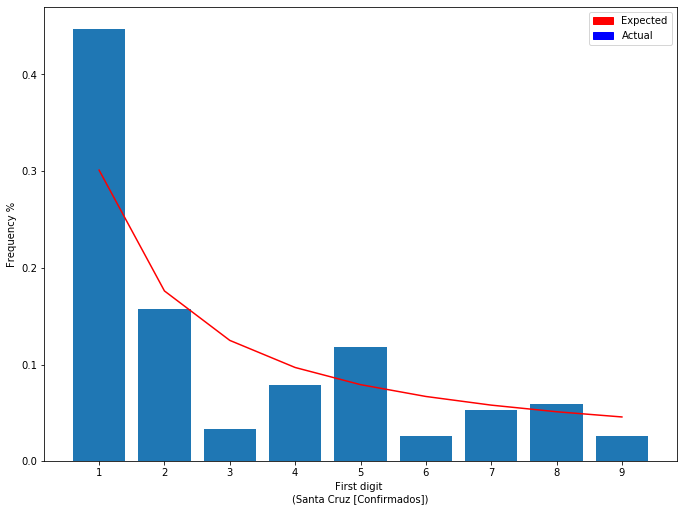

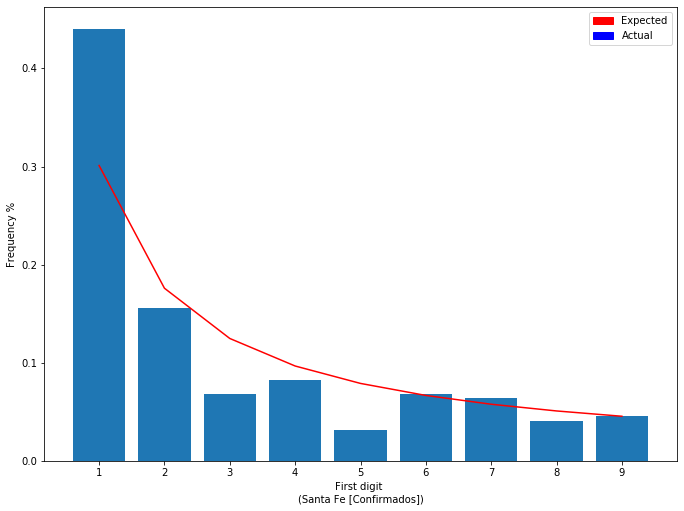

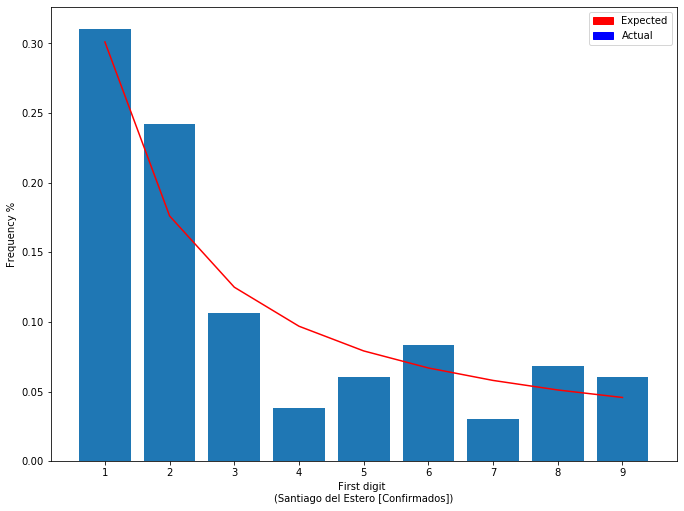

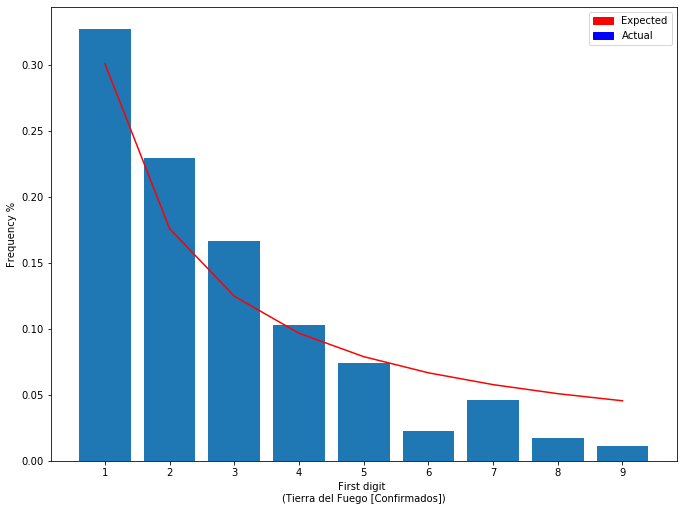

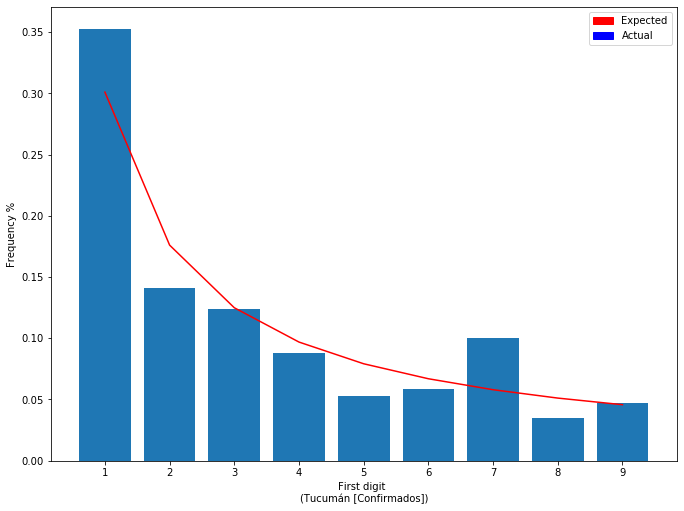

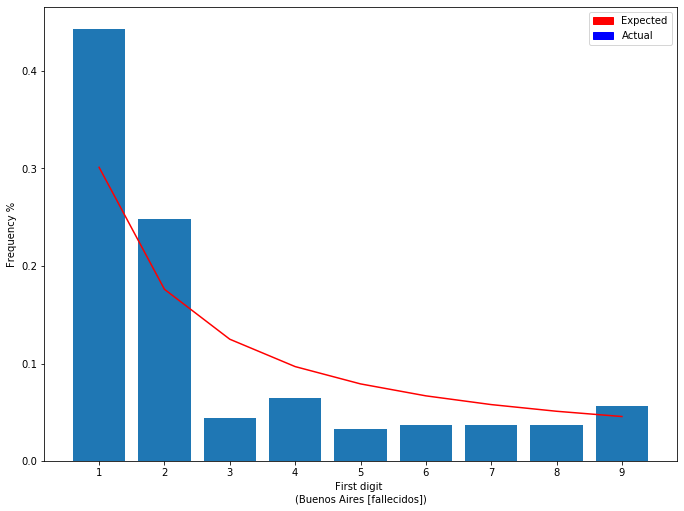

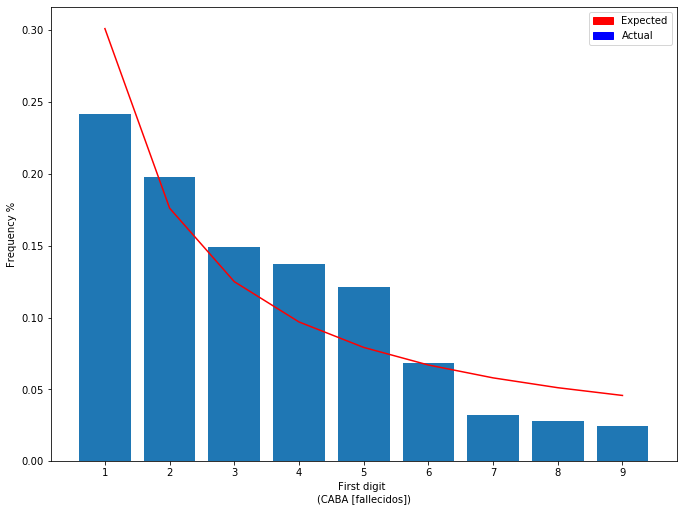

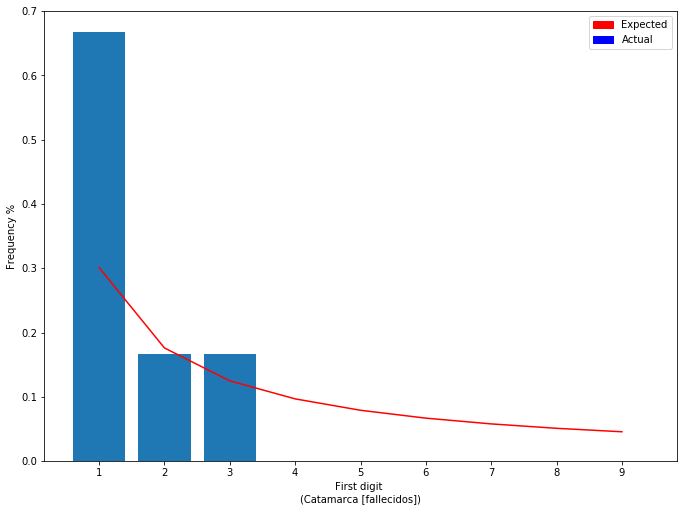

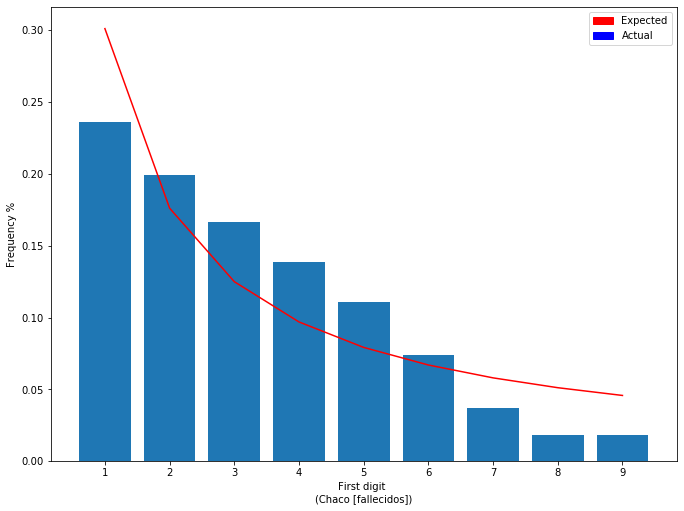

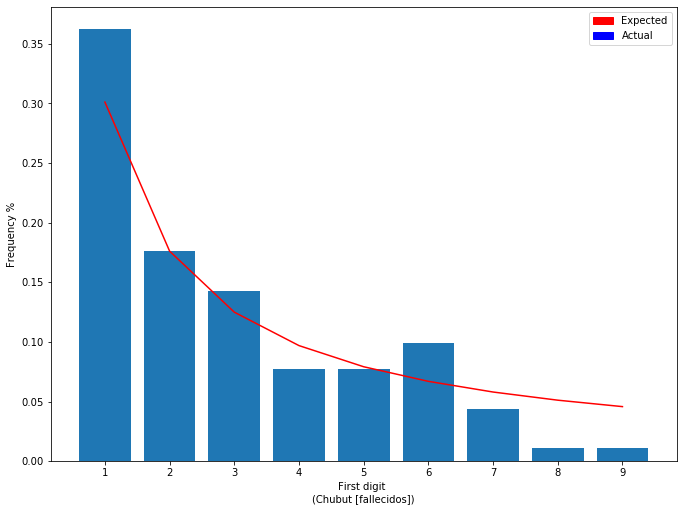

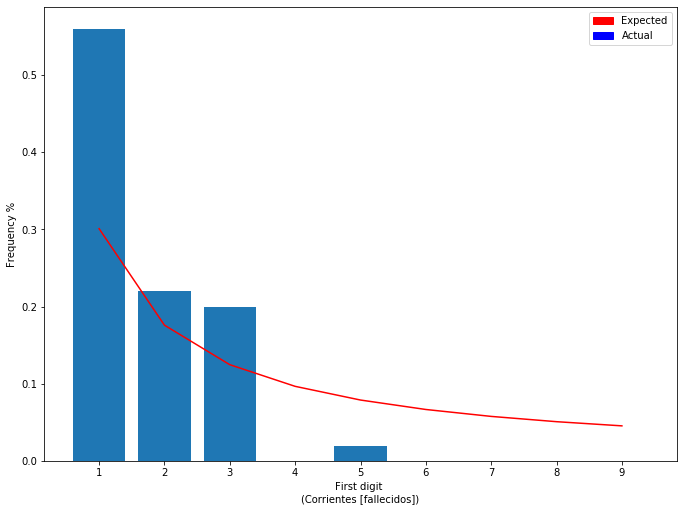

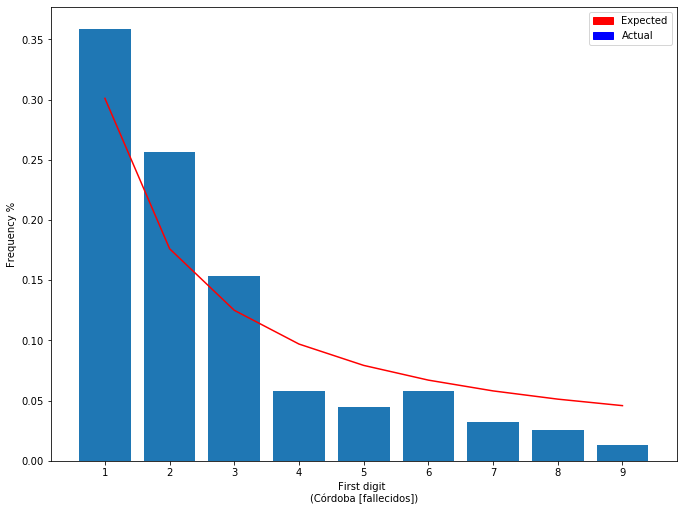

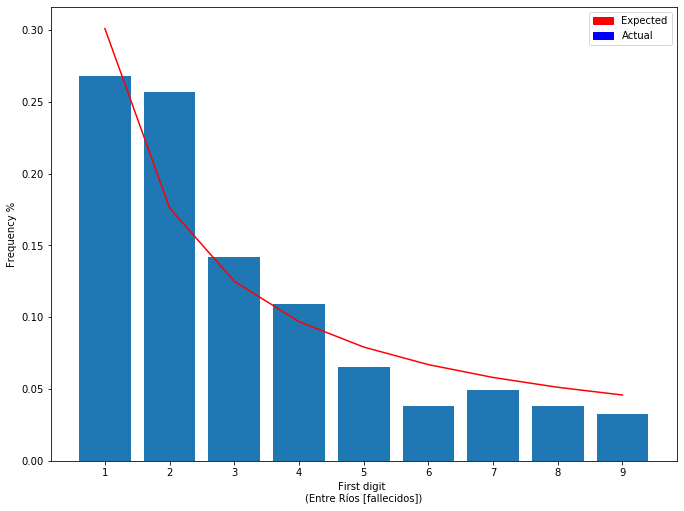

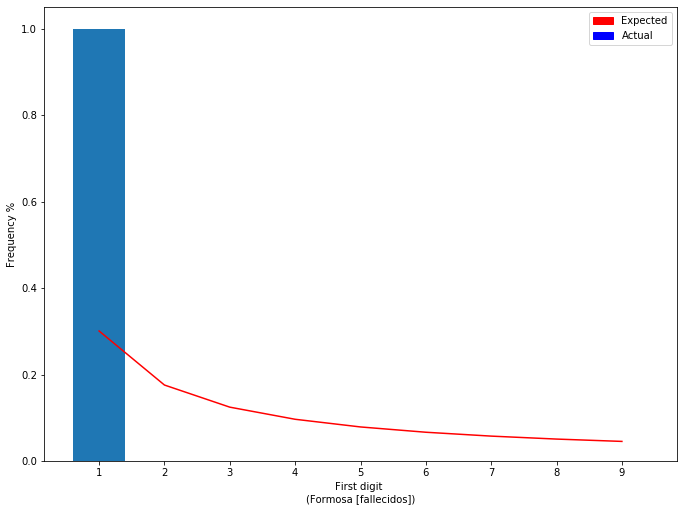

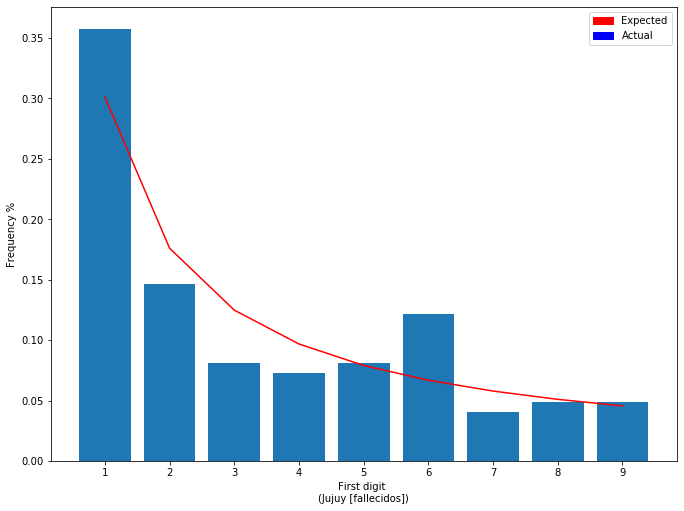

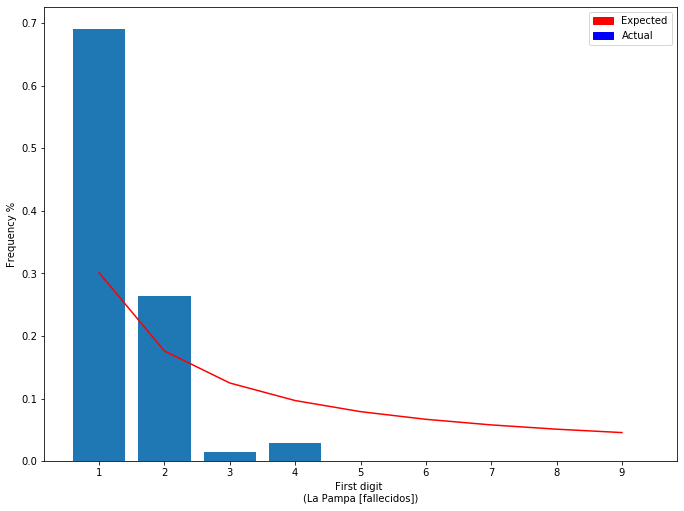

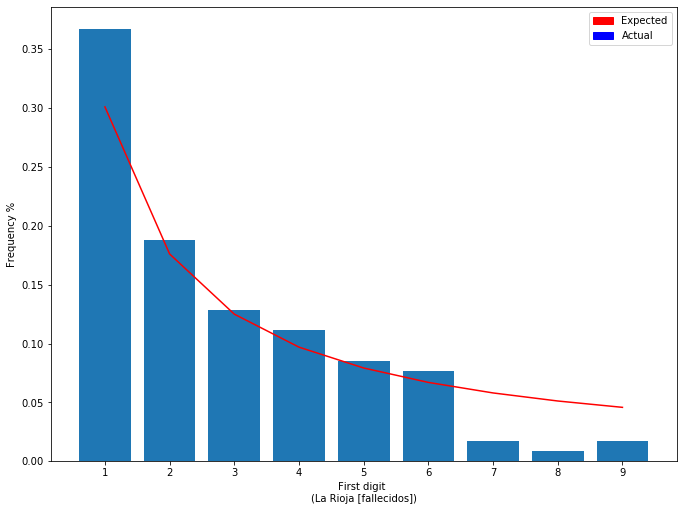

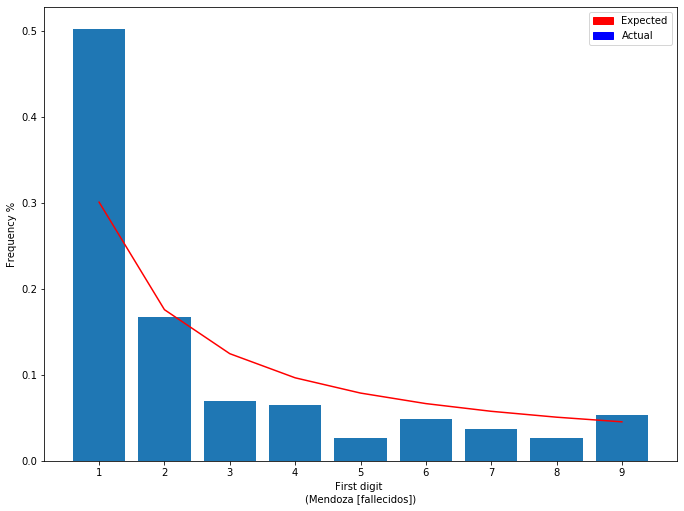

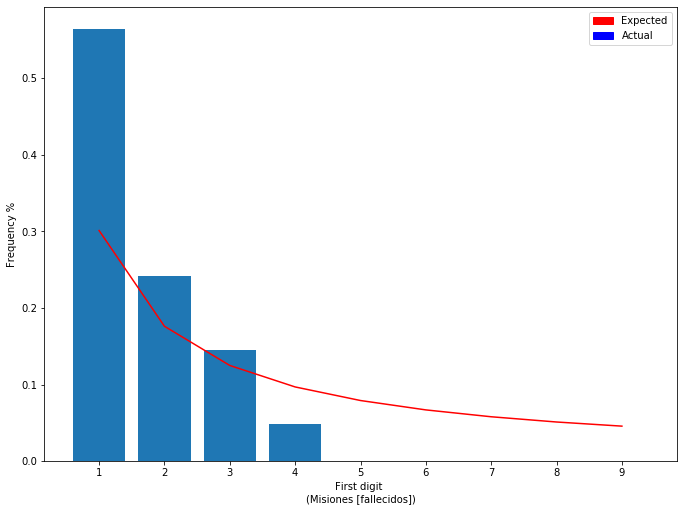

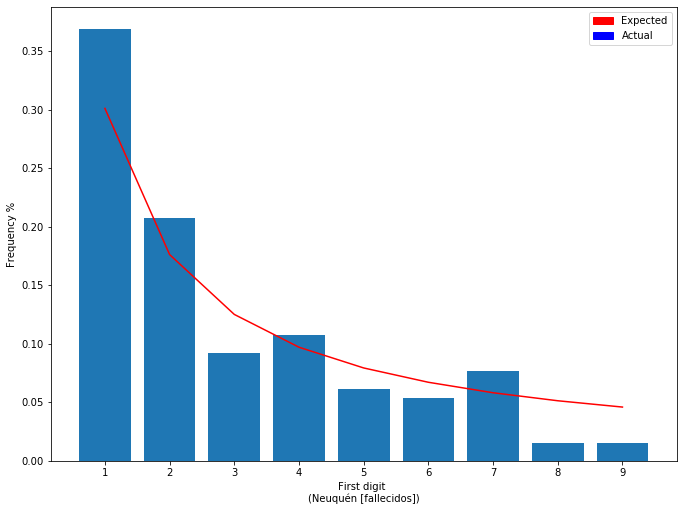

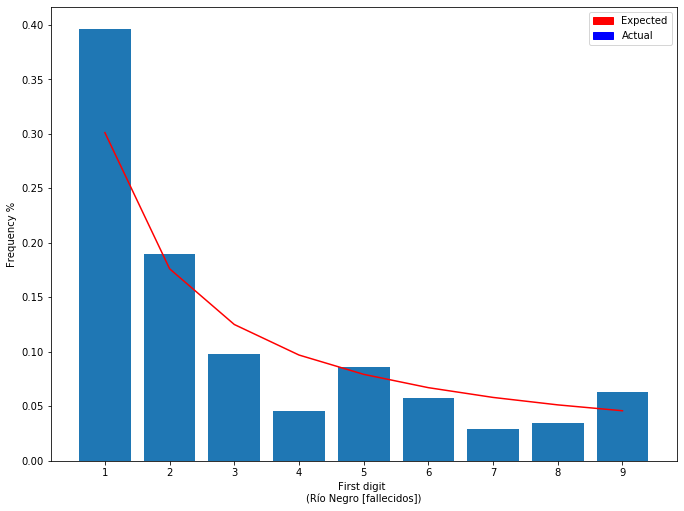

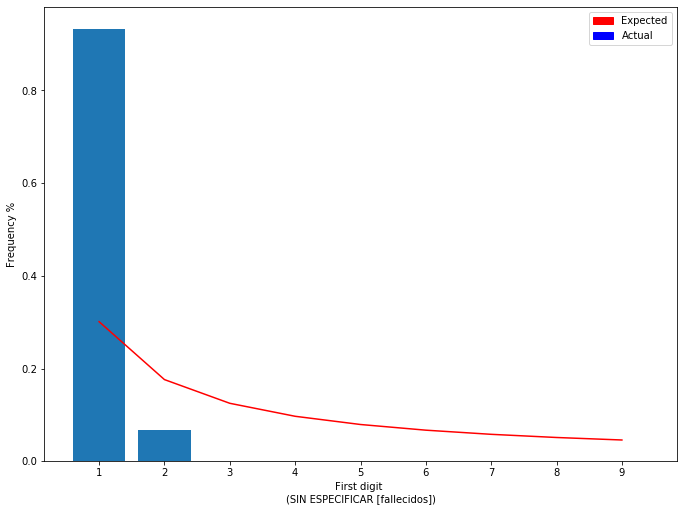

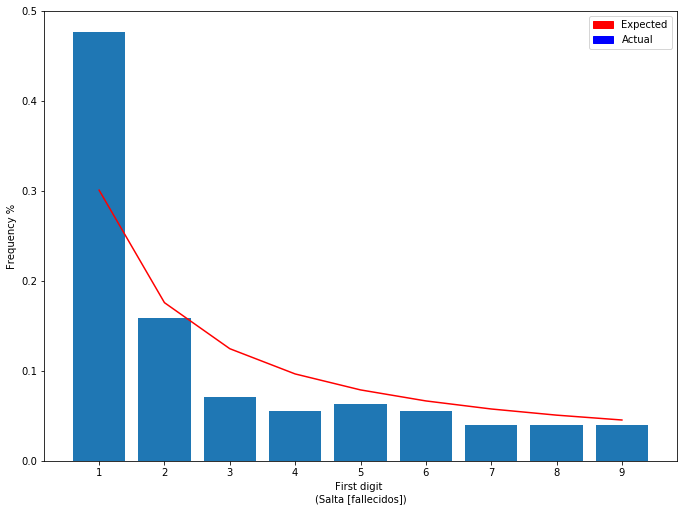

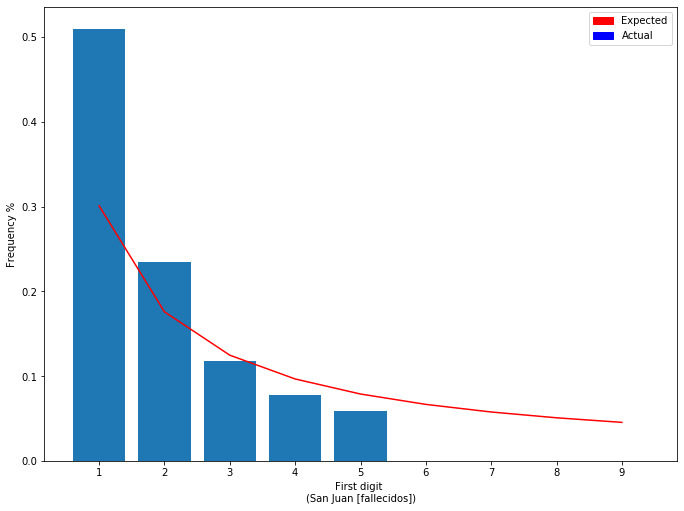

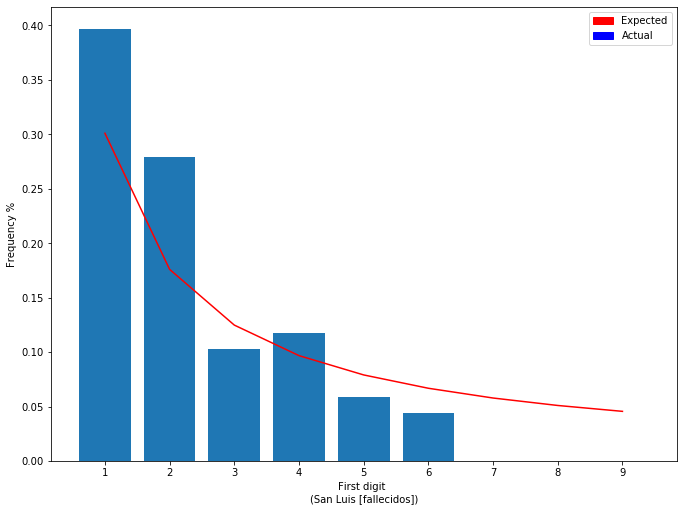

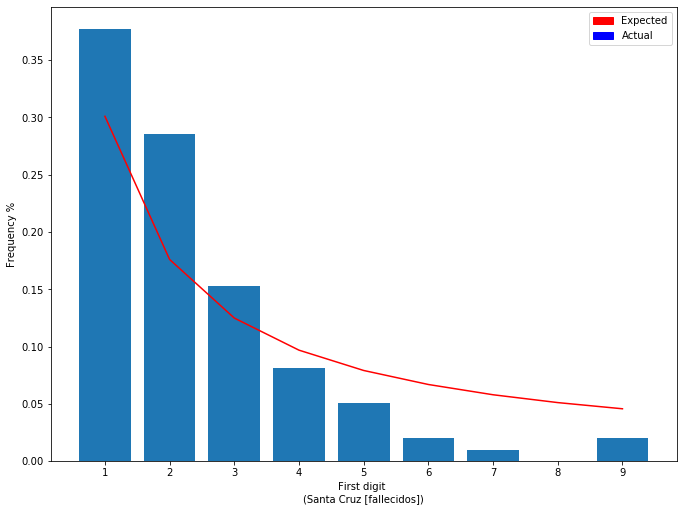

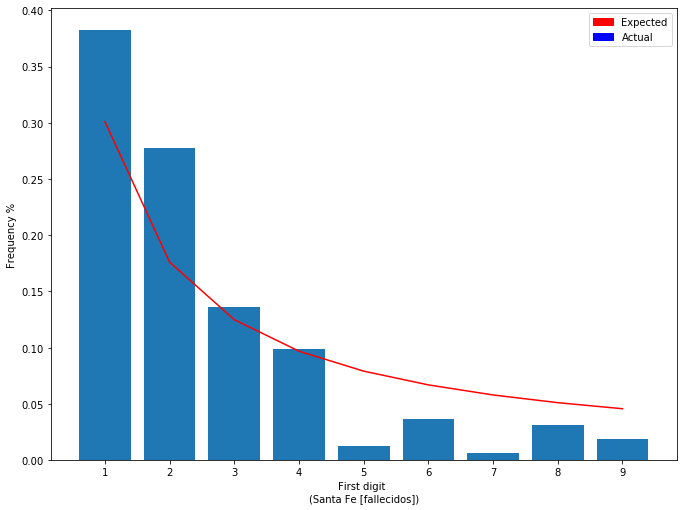

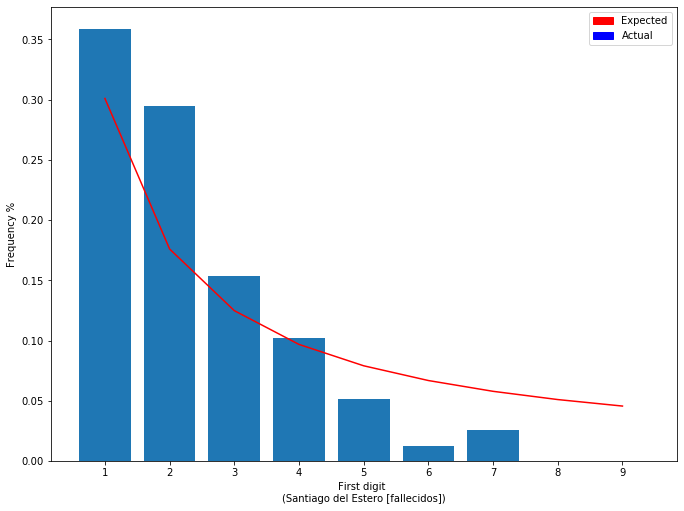

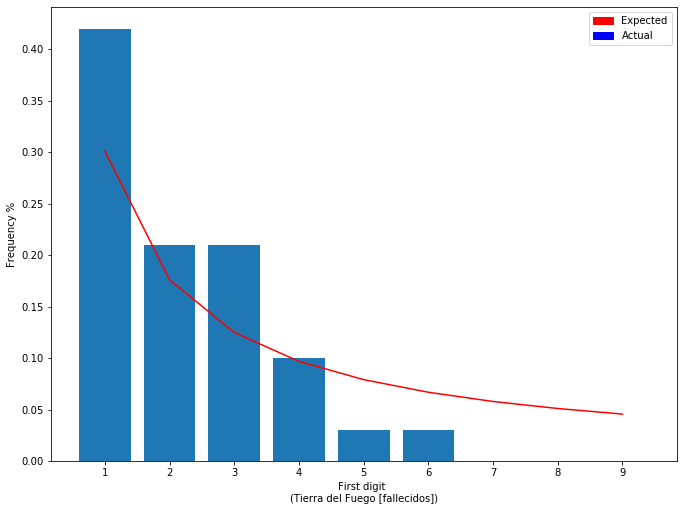

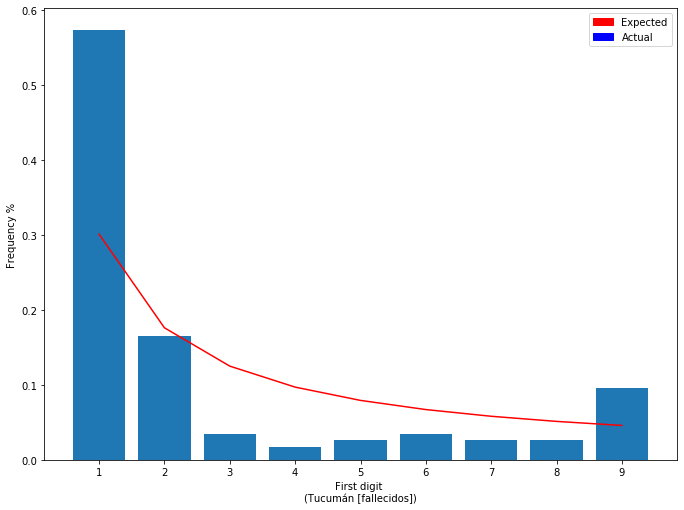

In [4]:
for p in provincias:
    digits = process_province(confirmados, p)
    show_benford_data(digits, p + " [Confirmados]")
    
for p in provincias:
    digits = process_province(fallecidos, p)
    show_benford_data(digits, p + " [fallecidos]")

#confirmados_gba = confirmados[confirmados['residencia_provincia_nombre'] == 'Buenos Aires']
#departamentos_gba = list(set(confirmados_gba['residencia_departamento_nombre'].tolist()))
#departamentos_gba = sorted(departamentos_gba)
#print(departamentos_gba)
    
#for d in departamentos_gba:
#    digits, skip = process_gba_zona(confirmados, d)
#    if skip:
#        print("skipping", d, "(not enough values): ")
#        continue
#    show_benford_data(digits, d + " [confirmados]")

In [5]:
#code to show all provinces in the same graph

#fig, ax = plt.subplots(nrows = int(math.ceil(len(provincias) / 5)), ncols = 5, figsize = (60, 80))
#ax = ax.reshape(-1)
#idx = 0

#for p in provincias:
#    digits = process_province(data, p)
#    show_benford_data(digits, p, fig, ax[idx])
#    idx = idx + 1
    
#fig.tight_layout()
#fig.savefig('benfords all.png')